### 설명을 덧붙이는 주석
- annotate() 함수를 사용
 - 주석 내용(텍스트)을 넣을 위치와 정렬 방법 등을 전달
- arrowprops 옵션을 사용하면 텍스트 대신 화살표 표현
 - 화살표 스타일, 시작점과 끝점의 좌표를 입력
 - dict : arrowprops에는 키가 지정되어 있음
- 예제에서는 주석을 넣을 여백 공간을 확보하기 위해서 ylim() 함수를 사용하여 y축의 범위 증가
- annotate() 함수를 사용하여 화살표와 텍스트의 위치를 잡아서 배치
 - 위치를 나타내는 (x, y) 좌표에서 x 값은 인덱스 번호 사용
  - x 위치에 '' (따옴표)로 묶어주어 값으로 표현 가능
 - y 값에는 인구수 데이터 숫자값을 사용
 - rotation 옵션 사용(양(+)의 회전 방향은 반시계 방향을 의미)

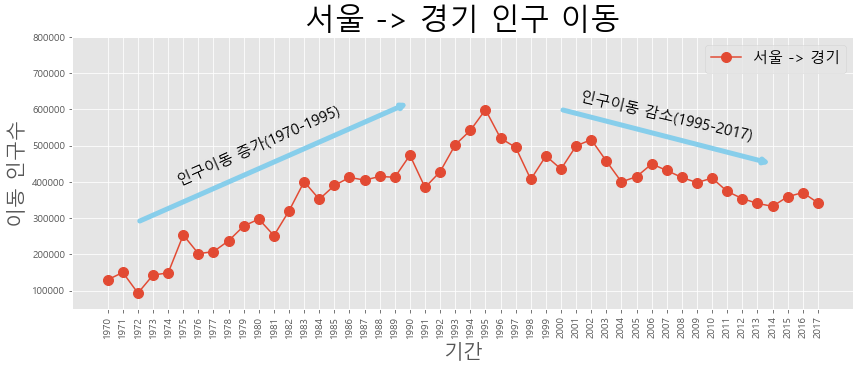

In [22]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈를 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전
# plt.xticks(rotation=90)
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot() 함수에 직접 입력
plt.plot(dt_g.index, dt_g.values, marker='o', markersize=10)  # 마커표시 추가

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size=30)

# 축이름 추가
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

# 범례 추가
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('', 
             xy=(20, 620000),    # 화살표의 머리 부분(끝점)
             xytext=(2, 290000), # 화살표의 꼬리 부분(시작점)
             xycoords='data',    # 좌표체계 
             # 화살표 서식
             # dict : 화살표의 특성을 지정
             # lw : 화살표의 두께
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)
            )

plt.annotate('', 
             xy=(44, 450000),    # 화살표의 머리 부분(끝점)
             xytext=(30, 600000), # 화살표의 꼬리 부분(시작점)
             xycoords='data',    # 좌표체계 
             # 화살표 서식
             # dict : 화살표의 특성을 지정
             # lw : 화살표의 두께
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)
            )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  # 텍스트 입력 
             xy=(10, 500000),             # 텍스트 위치 기준점(중간)
             rotation=24,                 # 텍스트 회전 각도
             va='center',                 # 텍스트 상하 정렬('center', 'top', 'bottom')
             ha='center',                 # 텍스트 좌우 정렬('center', 'left', 'right'),
             fontsize=15
            )

plt.annotate('인구이동 감소(1995-2017)',  # 텍스트 입력 
             xy=(37, 580000),             # 텍스트 위치 기준점(중간)
             rotation=-13,                 # 텍스트 회전 각도
             va='center',                 # 텍스트 상하 정렬('center', 'top', 'bottom')
             ha='center',                 # 텍스트 좌우 정렬('center', 'left', 'right'),
             fontsize=15
            )

# 차트를 시각화
plt.show()

- 1990년대 중반까지 서울 인구의 대규모 경기도 유입이 있었던 것을 확인 가능
- 1995년도를 정점으로 서울에서 경기도로 이동하는 인구가 계속 감소하고 있는 것을 확인 가능

### 화면을 분할하여 그래프 여러 개 그리기 - axe 객체 활용
화면을 여러 개로 분할하고 분할된 각 화면에 서로 다른 그래프를 그리는 방법
- 여러 개의 axe 객체를 생성, 분할된 화면마다 axe 객체를 하나씩 배정
 - axe 객체는 각각 서로 다른 그래프 표현 가능
 - 한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용
- figure() 함수를 사용하여 그래프를 그리는 그림틀 생성
 - figsize 옵션을 사용하여 (가로, 세로) 그림틀 크기 지정
 - fig 객체에 add_subplot() 함수를 적용하여 그림틀을 여러 개로 분할
- add_subplot() 함수 인자에 "행의 개수, 열의 개수, 서브플롯 순서"를 순서대로 입력
 - ex) ax1 = fig.add_subplot(2, 1, 1)
- 예제에서는 점으로만 구성된 그래프와 점, 선으로 구성된 그래프 두 개 생성

화면을 분할하여 그래프 여러 개 그리기 예제

C:\Users\student\AppData\Local\Temp/ipykernel_7112/3212341590.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dt_g.index, rotation=90)
C:\Users\student\AppData\Local\Temp/ipykernel_7112/3212341590.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dt_g.index, rotation=90)


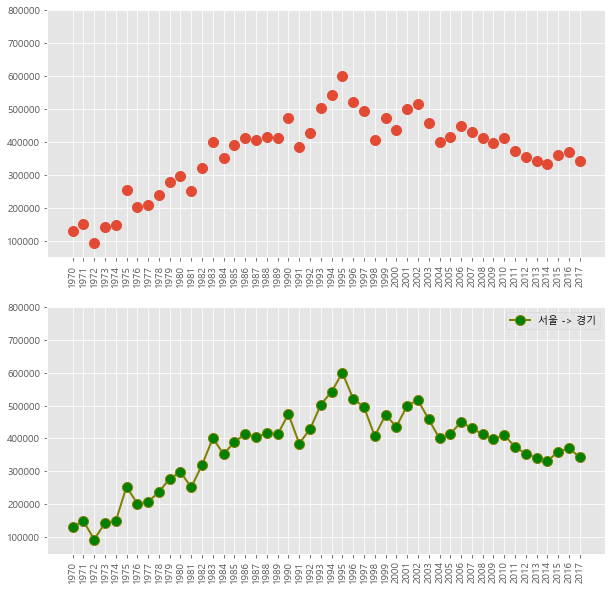

In [28]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
# marker : 마커의 모양('o', '+', '*', '.')
# markerfacecolor : 마커의 배경색
# markersize : 마커의 크기
# color : 선의 색
# linewidth : 선의 두깨
# label : 범례 지정
ax1.plot(dt_g, 'o', markersize=10)
ax2.plot(dt_g, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨을 회전
ax1.set_xticklabels(dt_g.index, rotation=90)
ax2.set_xticklabels(dt_g.index, rotation=90)

plt.show()

앞에서 그린 두 번째 그래프에 제목과 축 이름 추가
- ax 객체에 set_title() 함수를 적용하여 제목 추가
- set_xlabel() 함수로 x축 이름 지정
- set_ylabel() 함수로 y축 이름 지정
- tick_params() 함수로 축 눈금 라벨의 크기

axe 객체 그래프 꾸미기 예제

C:\Users\student\AppData\Local\Temp/ipykernel_7112/2918847040.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dt_g.index, rotation=90)


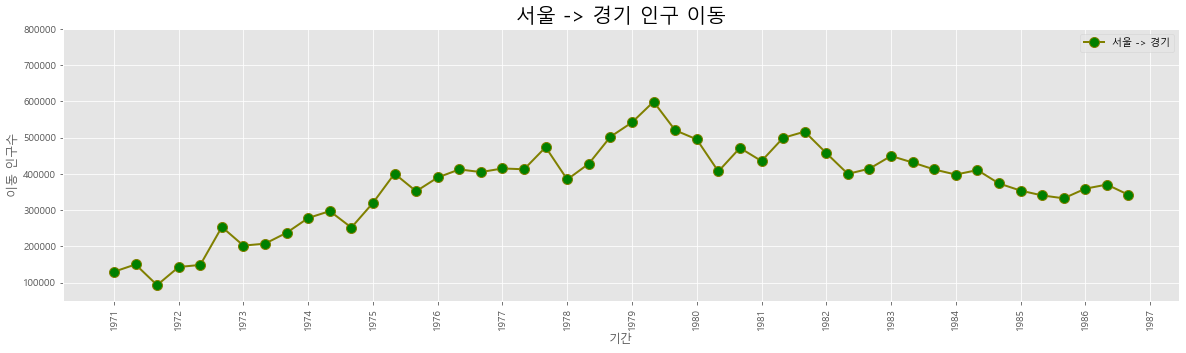

In [40]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
dt_g = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
# marker : 마커의 모양('o', '+', '*', '.')
# markerfacecolor : 마커의 배경색
# markersize : 마커의 크기
# color : 선의 색
# linewidth : 선의 두깨
# label : 범례 지정
ax.plot(dt_g, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

# y축 범위 지정
ax.set_ylim(50000, 800000)

# 차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax.set_xticklabels(dt_g.index, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

동일한 그림에 여러 개의 그래프를 추가
- 서울특별시에서 충청북도, 전라남도, 경상북도로 이동한 인구 변화 그래프 3개를 하나의 화면에 출력
- 각 지역에 해당하는 행을 선택, 선 그래프를 출력하는 plot() 메소드를 3번 적용

같은 화면에 그래프 추가하기 예제

C:\Users\student\AppData\Local\Temp/ipykernel_7112/2587534350.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


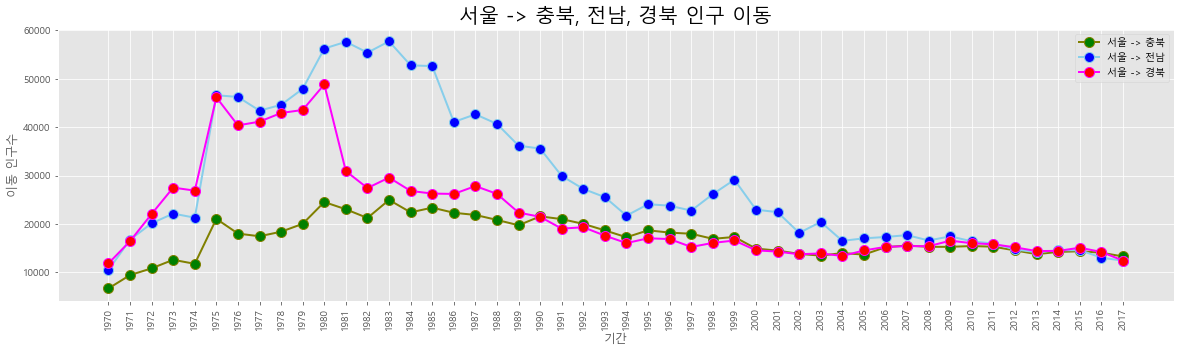

In [47]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청북도', '전라남도', '경상북도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot() 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청북도', :], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충북')
ax.plot(col_years, df_3.loc['전라남도', :], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 전남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 경북')

ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충북, 전남, 경북 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

화면 4분할 그래프 예제

C:\Users\student\AppData\Local\Temp/ipykernel_7112/3314551671.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\student\AppData\Local\Temp/ipykernel_7112/3314551671.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\student\AppData\Local\Temp/ipykernel_7112/3314551671.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\student\AppData\Local\Temp/ipykernel_7112/3314551671.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


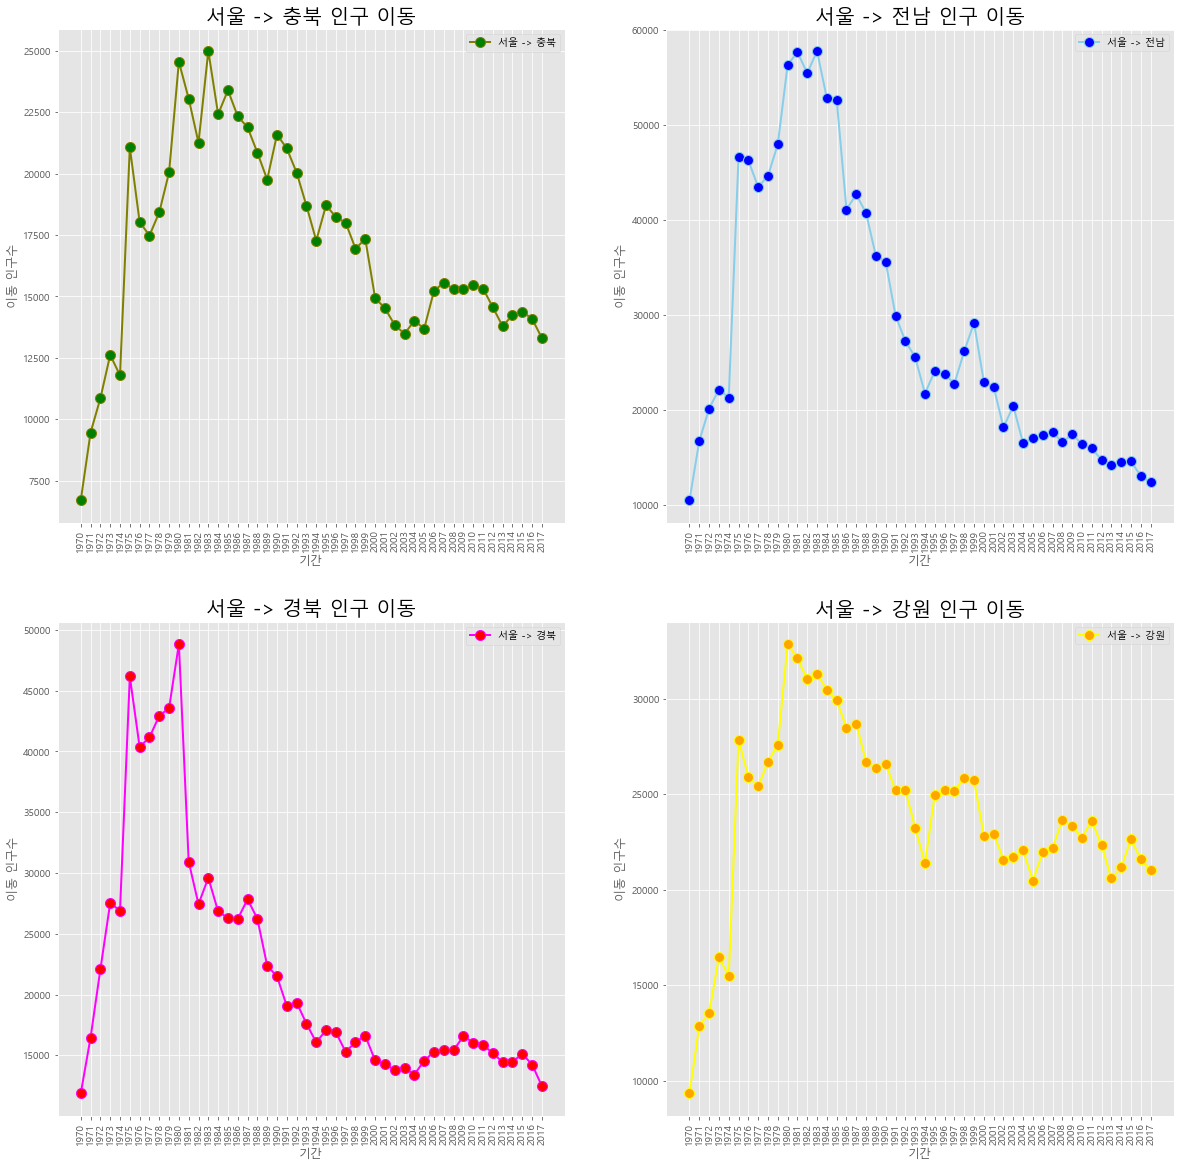

In [53]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot() 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청북도', :], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label='서울 -> 충북')
ax2.plot(col_years, df_4.loc['전라남도', :], marker='o', markerfacecolor='blue',
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 전남')
ax3.plot(col_years, df_4.loc['경상북도', :], marker='o', markerfacecolor='red',
        markersize=10, color='magenta', linewidth=2, label='서울 -> 경북')
ax4.plot(col_years, df_4.loc['강원도', :], marker='o', markerfacecolor='orange',
        markersize=10, color='yellow', linewidth=2, label='서울 -> 강원')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')


# 차트 제목 추가
ax1.set_title('서울 -> 충북 인구 이동', size=20)
ax2.set_title('서울 -> 전남 인구 이동', size=20)
ax3.set_title('서울 -> 경북 인구 이동', size=20)
ax4.set_title('서울 -> 강원 인구 이동', size=20)

# 축 이름 추가
ax1.set_xlabel('기간', size=12)
ax1.set_ylabel('이동 인구수', size=12)
ax2.set_xlabel('기간', size=12)
ax2.set_ylabel('이동 인구수', size=12)
ax3.set_xlabel('기간', size=12)
ax3.set_ylabel('이동 인구수', size=12)
ax4.set_xlabel('기간', size=12)
ax4.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨을 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=10)
ax2.tick_params(axis="x", labelsize=10)
ax2.tick_params(axis="y", labelsize=10)
ax3.tick_params(axis="x", labelsize=10)
ax3.tick_params(axis="y", labelsize=10)
ax4.tick_params(axis="x", labelsize=10)
ax4.tick_params(axis="y", labelsize=10)

# 간격 자동 조정
# fig.tight_layout()

plt.show()

---
**그래프 간격을 넓히고 싶은 경우**
- 자동 조정
 - tight_layout() 함수
 - ex) fig.tight_layout()
- 직접 조정
 - subplots_adjust()
 - ex) plt.subplots_adjust()
  - left, right, top, bottom, wspace(서브 플롯 사이의 좌우 예비 공간), hspace(서브 플롯 사이의 상하 예비 공간)
  
---

---
**Matplotlib에서 사용할 수 있는 색상 확인***

In [54]:
import matplotlib

# 컬러 정보를 받아올 변수
colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

---
### 면적 그래프
면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현, 선 그래프와 x축 사이의 공간에 색 적용
- 색의 투명도(alpha)를 지정(기본값 : 0.5, 범위 : 0 ~ 1)
- plot() 함수에 kind='area' 옵션을 추가
- 그래프를 누적할지의 여부 설정 가능(기본값 옵션 : stacked=True)
 - 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아올리는 방식
 - 각 열의 패턴과 열 전체의 합계가 어떻게 변하는지 확인 가능
 - stacked=False 옵션 사용시 각 그래프들이 누적되지 않고 서로 겹치게 표시됨

면적 그래프(stacked=False) 그리기 예제

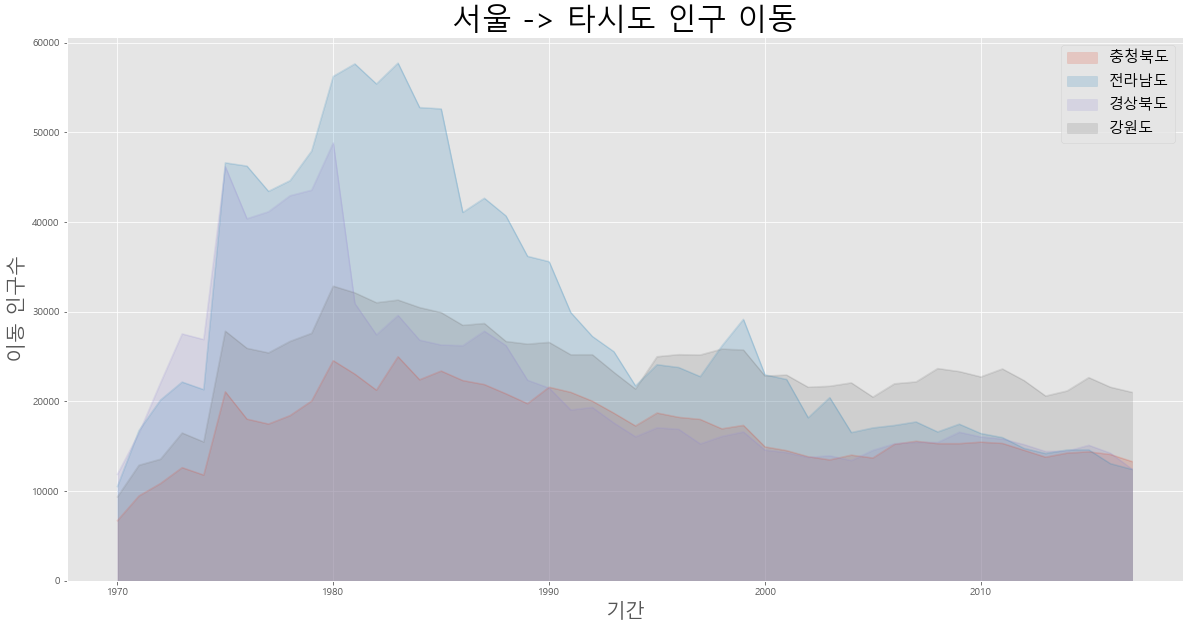

In [56]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형 변경
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

면적 그래프(stacked=True) 그리기 예제

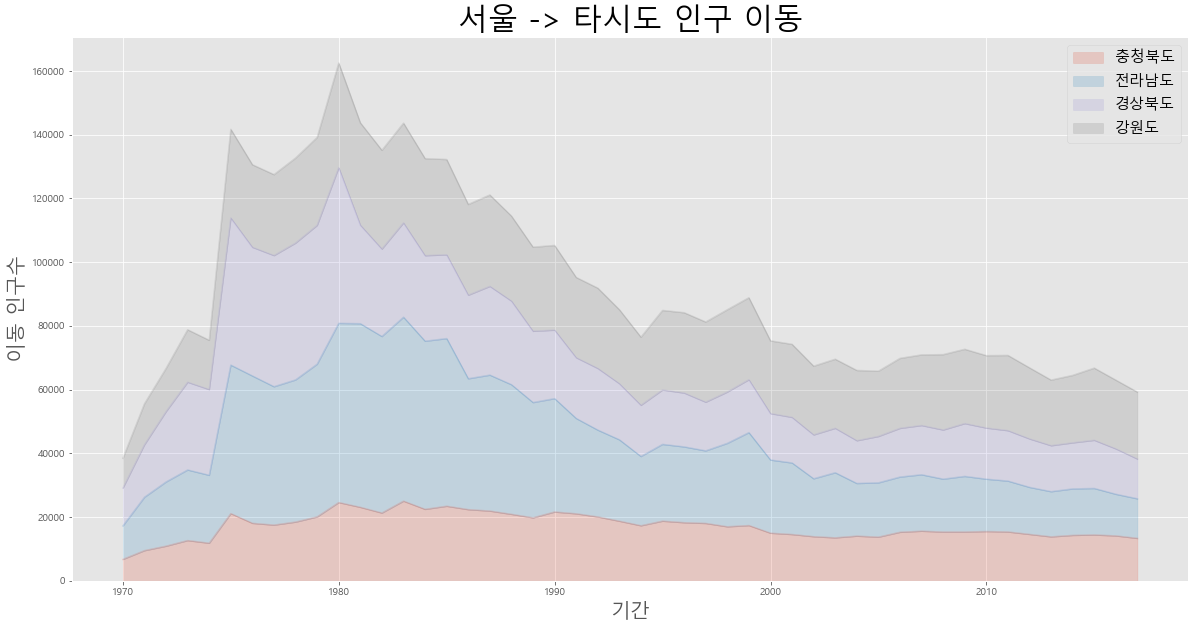

In [60]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형 변경
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

axe 객체(ax)의 세부적인 요소 설정 가능
- axe 객체의 속성을 이용하여 제목, 축 이름 설정 가능

axe 객체 속성 변경하기 예제

<class 'matplotlib.axes._subplots.AxesSubplot'>


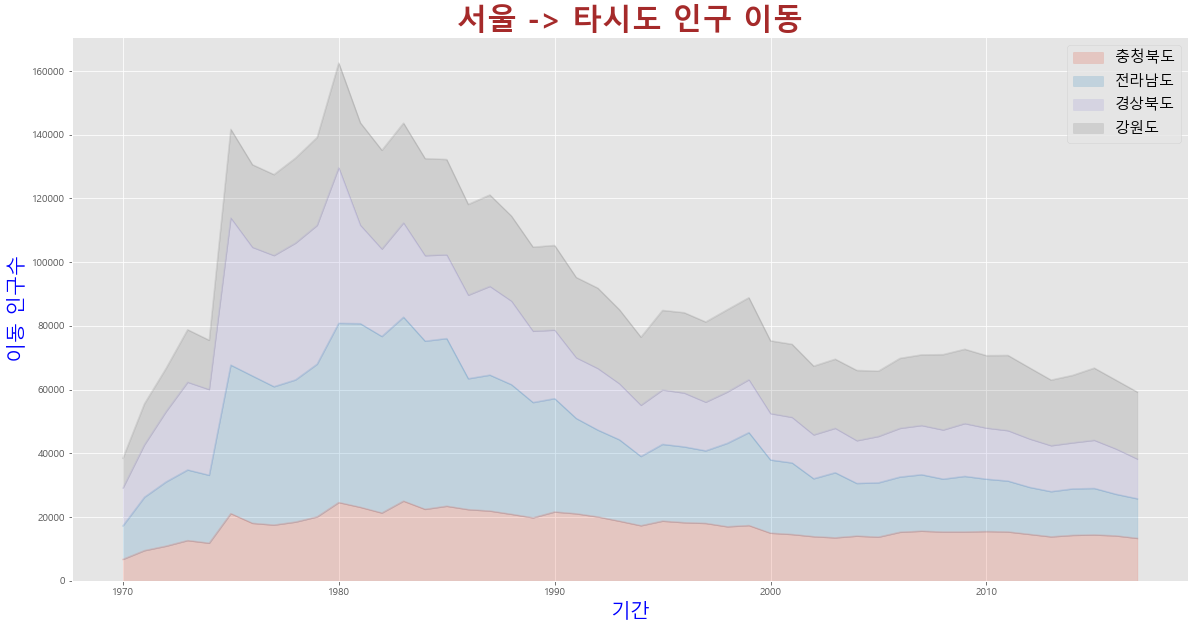

In [58]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형 변경
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_xlabel('기간', size=20, color='blue')
ax.set_ylabel('이동 인구수', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

### 막대 그래프
막대 그래프(bar plot)는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현
- 세로형 막대 그래프와 가로형 막대 그래프
 - 세로형 막대 그래프는 큰 차이 X
 - 데이터 값의 차이를 효과적으로 설명 가능
- plot() 함수에 kind='bar' 옵션 입력

세로형 막대 그래프 예제

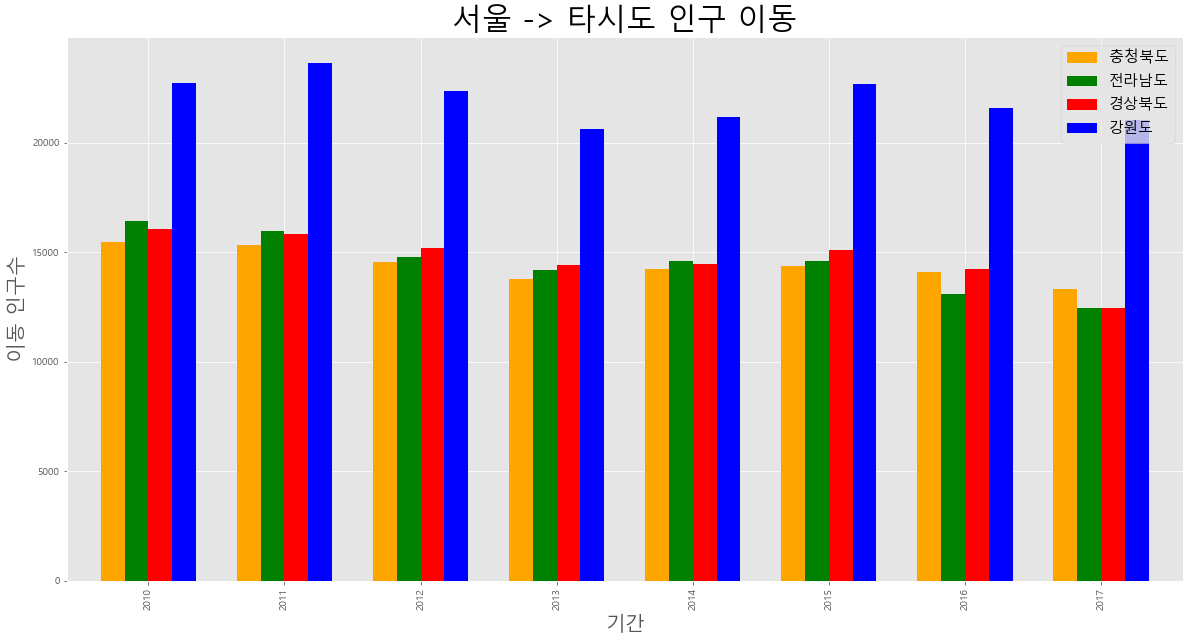

In [61]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]
df_4 = df_4.T

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임 인덱스를 정수형 변경
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='bar', figsize=(20, 10), width=0.7,
               color=['orange', 'green', 'red', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

가로형 막대 그래프
- plot() 함수에 kind='barh'를 입력

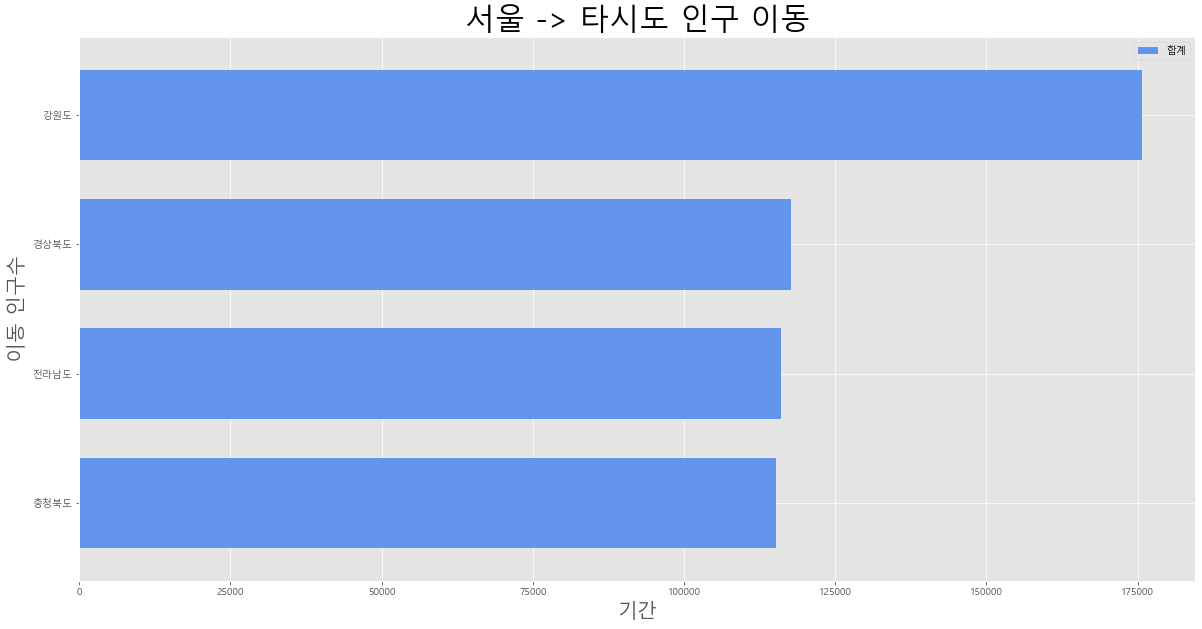

In [66]:
import pandas as pd

# 데이터 시각화에 사용할 matplotlib.pyplot 모듈을 import
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
# font_manager는 경로와 이름을 가지고 폰트를 지정
# rc는 폰트를 적용
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환
# 첫 열을 헤더로 사용
df = pd.read_excel("./시도별 전출입 인구수.xlsx", engine = "openpyxl", header = 0)

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청북도', '전라남도', '경상북도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청북도', '전라남도', '경상북도', '강원도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot')

# 면적 그래프 그리기
df_total.plot(kind='barh', figsize=(20, 10), width=0.7,
               color='cornflowerblue')

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.show()

### 히스토그램
히스토그램(histogram)은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현
- x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수(빈도)
- plot() 함수에 kind='hist' 옵션 사용
- bins=10 옵션을 사용하여 10개의 구간으로 분할

히스토그램 예제

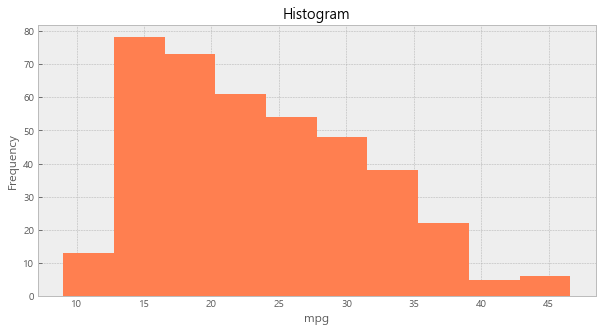

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('bmh')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

### 산점도
산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 표현
- plot() 함수에 kind='scatter' 옵션을 사용
 - x='weight' 옵션을 사용하여 x축에 위치할 변수(데이터프레임의 열)를 선택
 - y='mpg' 옵션을 사용하여 y축에 위치할 변수를 선택
 - 점의 색상(c)과 크기(s)를 설정하는 옵션 추가

산점도 예제

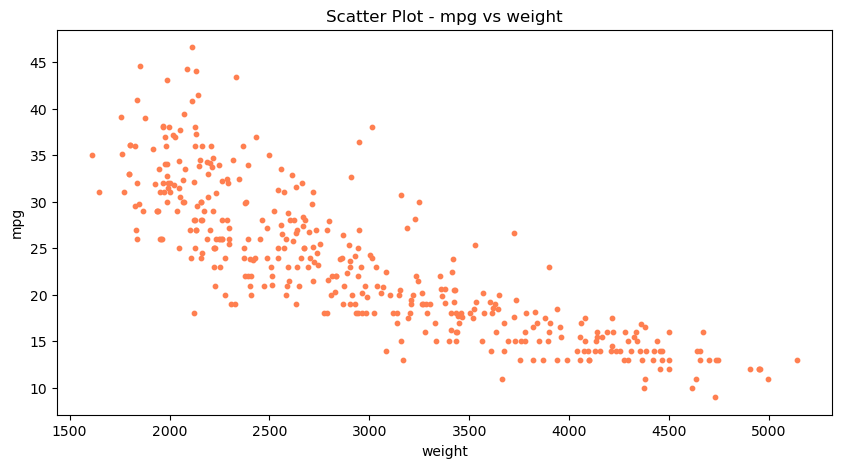

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

산점도에서 새로운 변수를 추가하여 점의 크기 또는 색상으로 표현 가능
- 새로운 변수로 실린더 개수('cylinders' 열)를 추가
- 실린더 개수를 나타내는 정수를 그대로 쓰는 대신, 해당 열의 최대값 대비 상대적 크기를 나태는 비율을 계산하여 cylinders_size 변수에 저장
- 점의 크기에 변화를 주기 때문에 비눗방울과 비슷하여 '버블 차트'라고 부름

버블 차트 예제

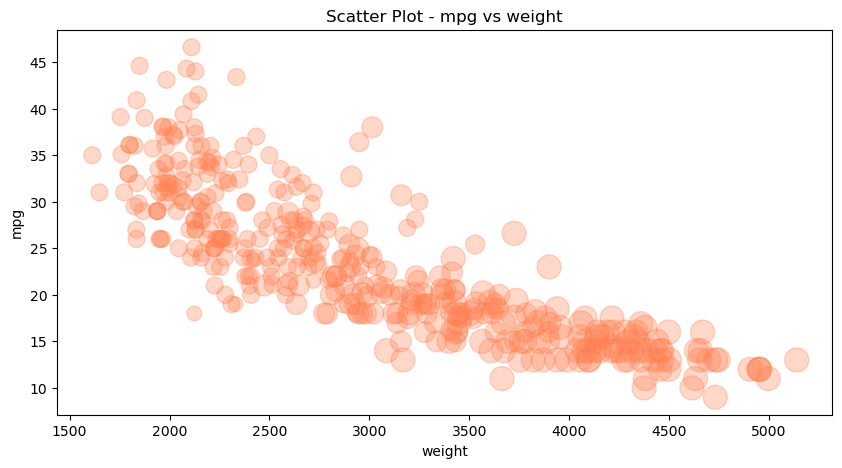

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

# cylinders 개수의 상대적 비율을 계산
cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=cylinders_size, 
        figsize=(10, 5), alpha=0.3)
plt.title('Scatter Plot - mpg vs weight')
plt.show()

### 그래프를 그림 파일로 저장
- savefig() 함수로 파일을 저장
 - 일반 파일로 저장(scatter.png)
 - 배경을 투명하게 하여 저장(scatter_transparent.png)
- markder='+' 옵션으로 점의 모양을 십자(+)로 표시
- 색상을 정하는 컬러맵을 사용

그림 파일 저장 예제

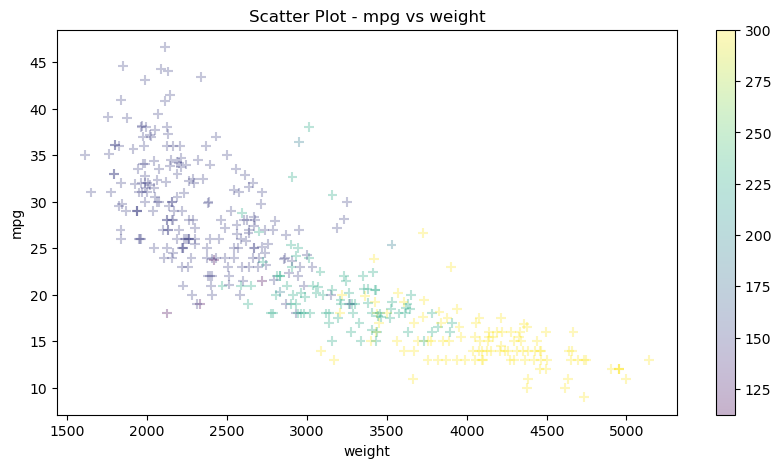

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

# cylinders 개수의 상대적 비율을 계산
cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind='scatter', x='weight', y='mpg', marker='+', c=cylinders_size, 
        cmap='viridis', s=50, figsize=(10, 5), alpha=0.3)
plt.title('Scatter Plot - mpg vs weight')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)

plt.show()

### 파이 차트
파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현
- 데이터 값의 크기에 비례
- plot() 함수에 kind='pie' 옵션을 사용

파이 차트 만들기
- 데이터 개수를 세기 위해 숫자 1을 원소로 갖는 'count' 열을 생성
- groupby() 함수를 사용하여 '제조국가'를 3개의 그룹으로 나눔
- sum() 함수를 사용하여 그룹별 개수의 합계를 계산

파이 차트 예제

           mpg  cylinders  displacement  weight  acceleration  model year  \
origin                                                                      
1       5000.8       1556       61229.5  837121        3743.4       18827   
2       1952.4        291        7640.0  169631        1175.1        5307   
3       2405.6        324        8114.0  175477        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


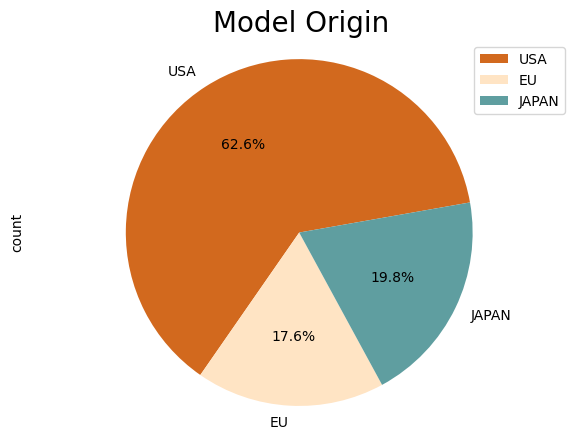

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

# 데이터 개수 카운트를 위해 값 1을 원소로 갖는 열을 추가
df['count'] = 1

# origin 열을 기준으로 그룹화, 합계 연산
df_origin = df.groupby('origin').sum()
print(df_origin)

# 제조국가 이름 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# count 열을 사용하여 파이 차트 만들기
df_origin['count'].plot(kind='pie', figsize=(7, 5), autopct='%0.1f%%',
                        startangle=10, colors=['chocolate', 'bisque', 'cadetblue'])

plt.title('Model Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')

plt.show()

제조국가별 연비 분포를 보여주는 박스 플롯 그리기
- 그림틀을 2개의 axe 객체로 분할하기 위해서 add_subplot() 함수 사용
 - 수직 박스 플롯은 vert=True 옵션 사용
 - 수평 박스 플롯은 vert=False 옵션 사용
- 각 axe 객체에 박스 플롯을 그리는 boxplot() 함수를 사용

박스 플롯 예제

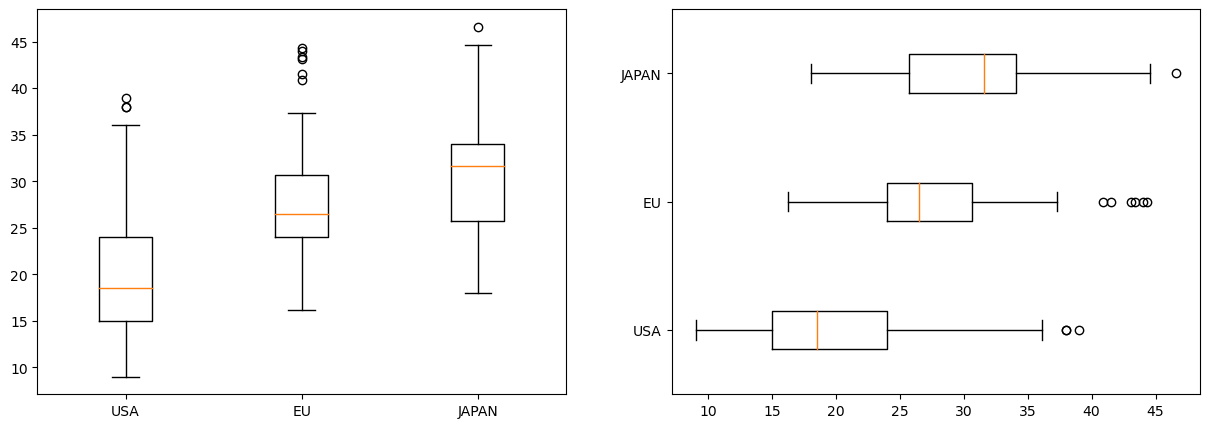

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
# 열을 따로 지정해주지 않기 위해 header=None 옵션 사용
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
              'acceleration', 'model year', 'origin', 'name']

# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 박스 플롯 만들기
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'],
            vert=False)

plt.show()